In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing important libraries**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [118]:
df=pd.read_csv("/content/drive/MyDrive/Life Expectancy Data.csv")

df

Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]

# **Data Analysis & Data Visualization**

In [119]:
df.shape

(2938, 22)


the dataset has 2938 rows and 22 columns.

In [120]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [121]:

df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

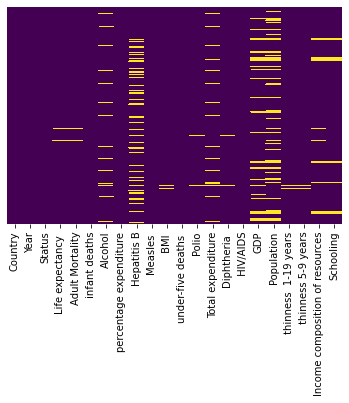

In [122]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This says there are Missing Values. fill it

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**as the objects data has no missing data , just encode it**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


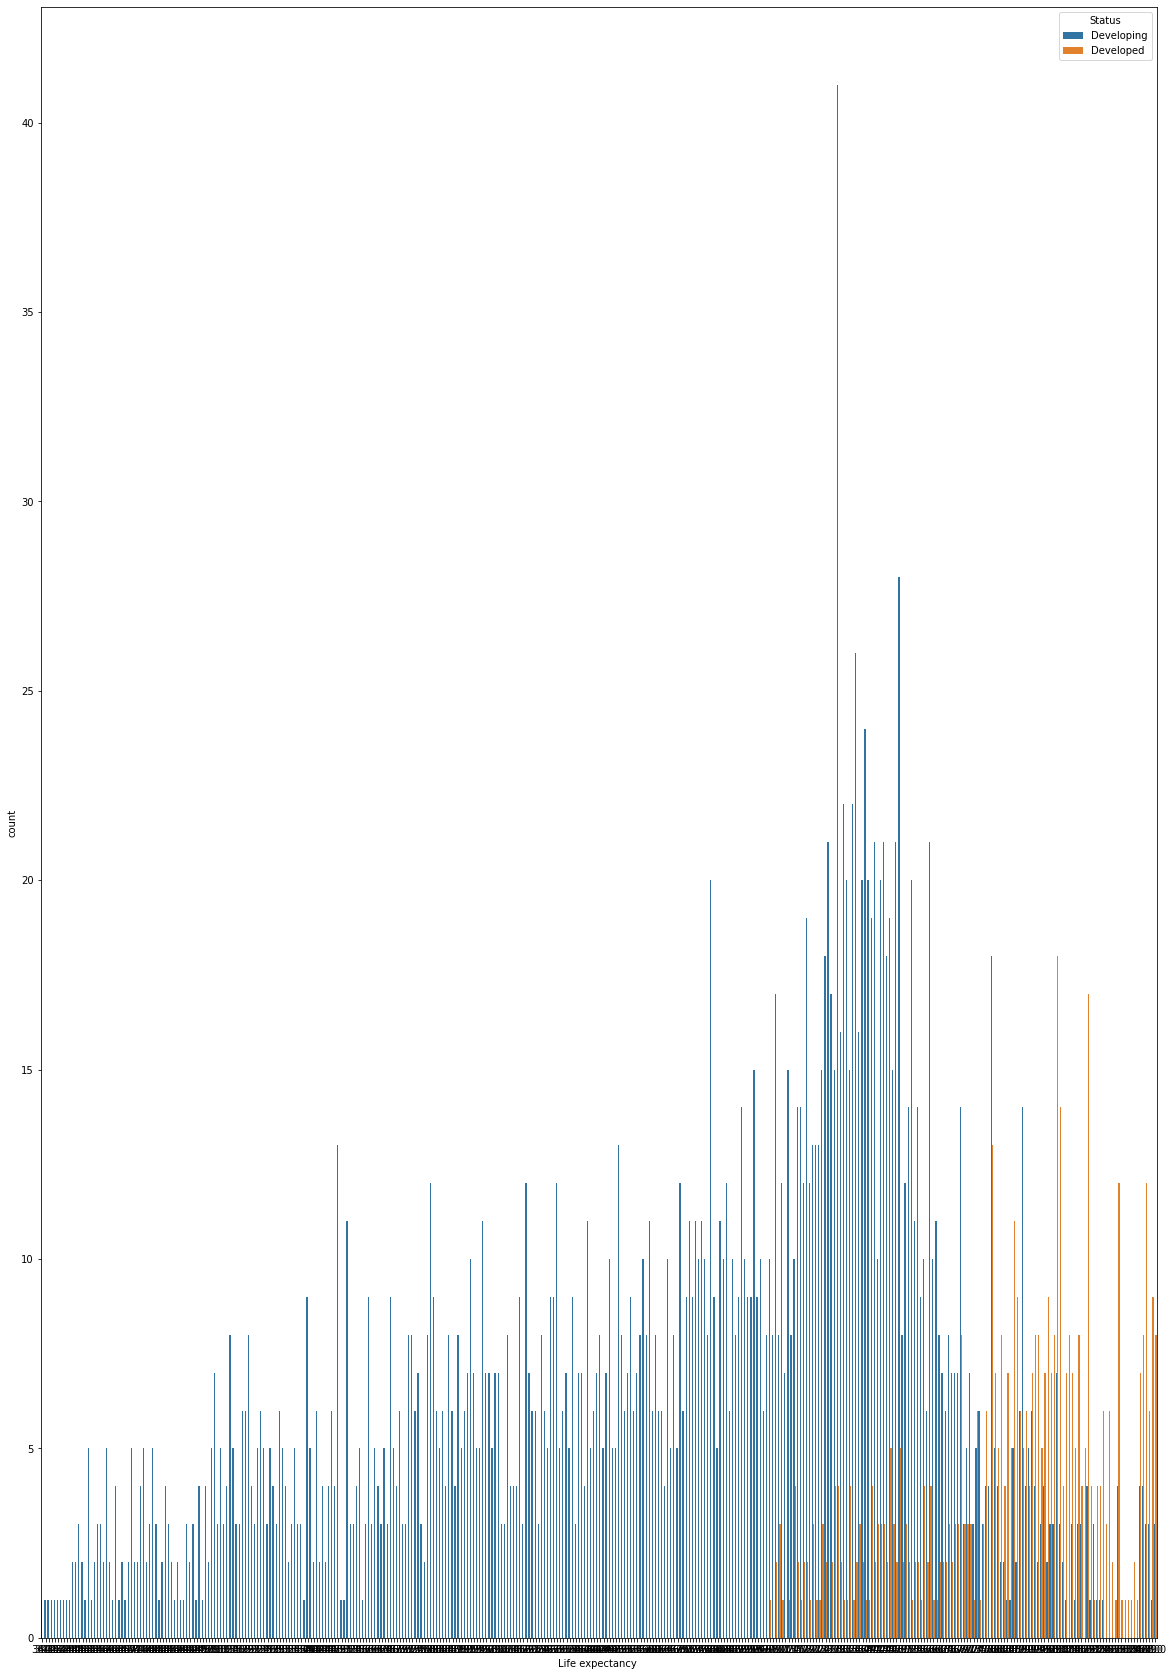

In [124]:
plt.figure(figsize=(20,30))
sns.countplot('Life expectancy ',hue="Status",data=df)
plt.show()

**Devloped country**

**is more effectiveness on expecttancy**





In [125]:
df['Country'].value_counts()

France                              16
Seychelles                          16
Lao People's Democratic Republic    16
Senegal                             16
Burkina Faso                        16
                                    ..
Saint Kitts and Nevis                1
Tuvalu                               1
Palau                                1
Cook Islands                         1
San Marino                           1
Name: Country, Length: 193, dtype: int64

In [126]:
# create a function for level encoding
def level_encoding(feature):
    feature_sort=df[feature].value_counts().index
    features={}
    j=0
    for i in feature_sort:
        features[i]=j
        j+=1
    df[feature]=df[feature].map(features)

In [127]:
level_encoding('Country')

In [128]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [129]:
level_encoding('Status')

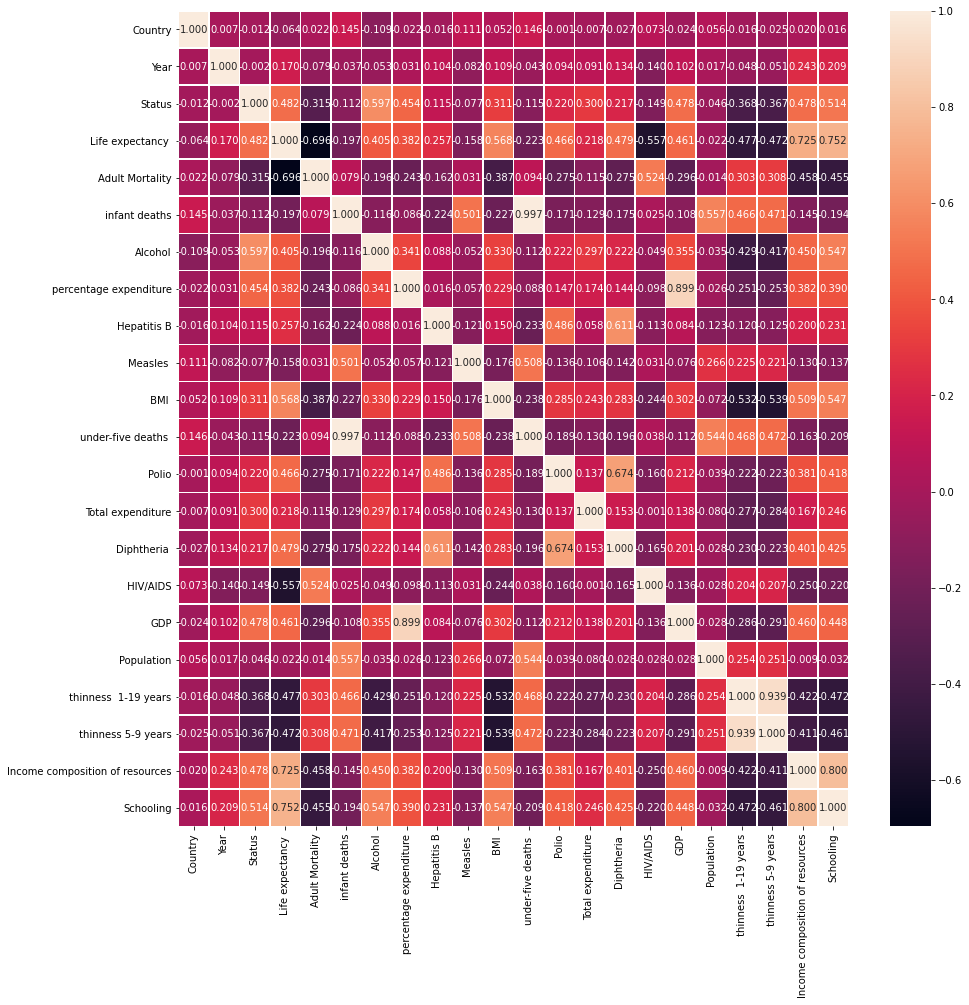

In [130]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

**now time to Filling the missing data**

In [131]:
df['Life expectancy '].value_counts()


73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
49.5     1
44.0     1
83.2     1
55.2     1
83.7     1
Name: Life expectancy , Length: 362, dtype: int64

<Figure size 1800x1080 with 0 Axes>

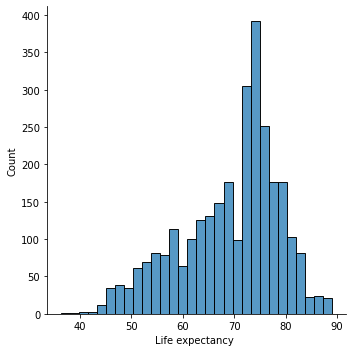

In [132]:
plt.figure(figsize=(25,15))
sns.displot(df['Life expectancy '])
plt.show()

In [133]:
df['Life expectancy ']=df['Life expectancy '].fillna("Unknown")

In [134]:
df_data = df[df['Life expectancy '] != "Unknown"]

In [135]:
df_data

Country  Year  ...  Income composition of resources Schooling
0         158  2015  ...                            0.479      10.1
1         158  2014  ...                            0.476      10.0
2         158  2013  ...                            0.470       9.9
3         158  2012  ...                            0.463       9.8
4         158  2011  ...                            0.454       9.5
...       ...   ...  ...                              ...       ...
2933       92  2004  ...                            0.407       9.2
2934       92  2003  ...                            0.418       9.5
2935       92  2002  ...                            0.427      10.0
2936       92  2001  ...                            0.427       9.8
2937       92  2000  ...                            0.434       9.8

[2928 rows x 22 columns]

In [136]:
df_data['Life expectancy ']=pd.to_numeric(df_data['Life expectancy '])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   int64  
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [138]:
df_data['Life expectancy '].value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
49.5     1
44.0     1
83.2     1
55.2     1
83.7     1
Name: Life expectancy , Length: 362, dtype: int64

In [139]:
df_test = df[df['Life expectancy '] == "Unknown"]

In [140]:
df_test

Country  Year  ...  Income composition of resources Schooling
624       191  2013  ...                              NaN       NaN
769       187  2013  ...                            0.721      12.7
1650      186  2013  ...                              NaN       0.0
1715      183  2013  ...                              NaN       NaN
1812      185  2013  ...                              NaN       9.6
1909      184  2013  ...                              NaN       NaN
1958      190  2013  ...                            0.779      14.2
2167      188  2013  ...                            0.749      13.4
2216      192  2013  ...                              NaN      15.1
2713      189  2013  ...                              NaN       0.0

[10 rows x 22 columns]

**df_test is not useful for testing**

In [141]:
df_data['Adult Mortality'].value_counts()

12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
592.0     1
244.0     1
472.0     1
686.0     1
679.0     1
Name: Adult Mortality, Length: 425, dtype: int64

<Figure size 1800x1080 with 0 Axes>

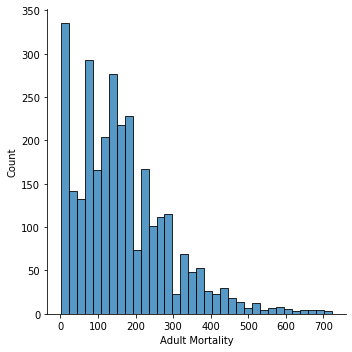

In [142]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Adult Mortality'])
plt.show()

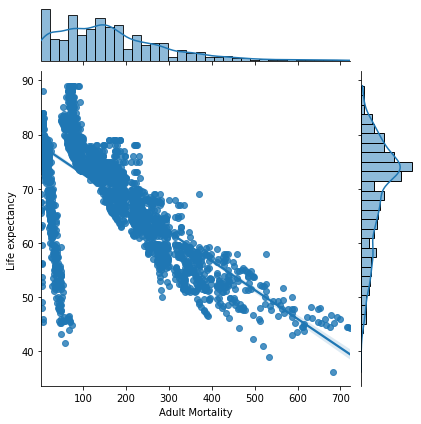

In [143]:
sns.jointplot(x="Adult Mortality",y='Life expectancy ',data=df_data, kind="reg")

**Mortality rate has a direct regression (-ve) relation ship with**

**elife expecttancy**


In [144]:
df_data['Adult Mortality']=df_data['Adult Mortality'].fillna(df_data['Adult Mortality'].mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
df_data['Alcohol'].value_counts()

0.01     280
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

<Figure size 1800x1080 with 0 Axes>

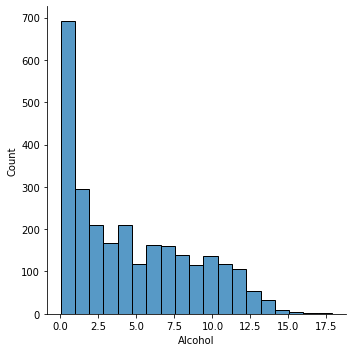

In [146]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Alcohol'])
plt.show()

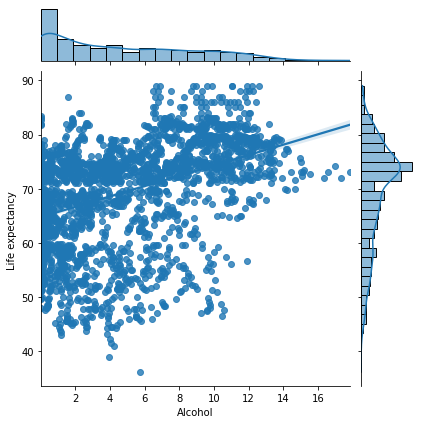

In [147]:
sns.jointplot(x='Alcohol',y='Life expectancy ',data=df_data, kind="reg")

In [148]:
df_data['Alcohol']=df_data['Alcohol'].fillna(0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df_data['Hepatitis B'].value_counts()

99.0    237
98.0    209
96.0    166
97.0    154
95.0    149
       ... 
19.0      1
23.0      1
11.0      1
1.0       1
12.0      1
Name: Hepatitis B, Length: 87, dtype: int64

<Figure size 1800x1080 with 0 Axes>

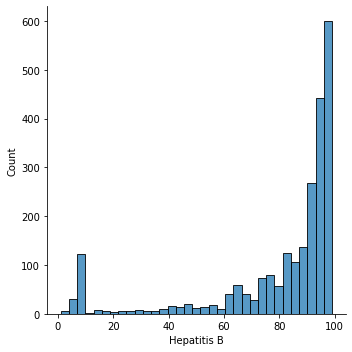

In [150]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Hepatitis B'])
plt.show()

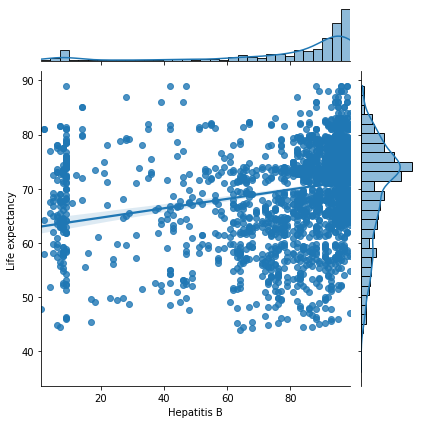

In [151]:
sns.jointplot(x='Hepatitis B',y='Life expectancy ',data=df_data, kind="reg")

In [152]:
df_data['Hepatitis B']=df_data['Hepatitis B'].fillna(99.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_data[' BMI '].value_counts()

58.5    18
55.8    16
57.0    16
54.2    15
59.9    15
        ..
26.6     1
69.0     1
37.7     1
69.5     1
74.1     1
Name:  BMI , Length: 602, dtype: int64

<Figure size 1800x1080 with 0 Axes>

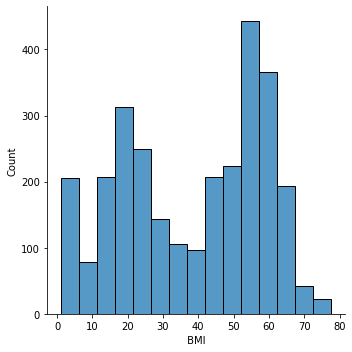

In [154]:
plt.figure(figsize=(25,15))
sns.displot(df_data[' BMI '])
plt.show()

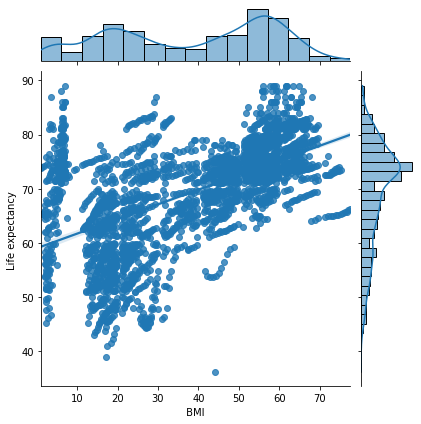

In [155]:
sns.jointplot(x=' BMI ',y='Life expectancy ',data=df_data, kind="reg")

In [156]:
df_data[' BMI '].mean

<bound method Series.mean of 0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name:  BMI , Length: 2928, dtype: float64>

In [157]:
df_data[' BMI ']=df_data[' BMI '].fillna(19.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
df_data['Polio'].value_counts()

99.0    373
98.0    254
97.0    205
96.0    205
95.0    180
       ... 
48.0      2
39.0      2
17.0      1
23.0      1
33.0      1
Name: Polio, Length: 73, dtype: int64

<Figure size 1800x1080 with 0 Axes>

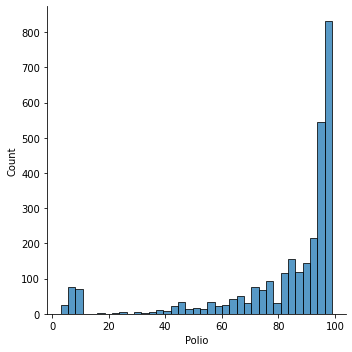

In [159]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Polio'])
plt.show()

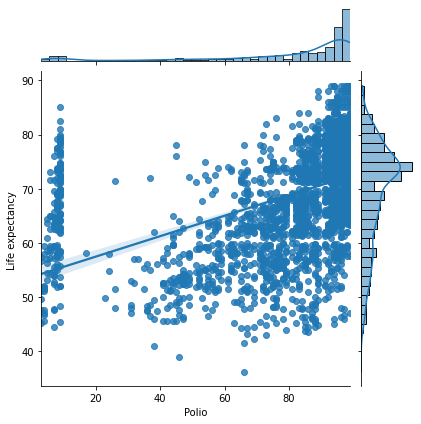

In [160]:
sns.jointplot(x='Polio',y='Life expectancy ',data=df_data, kind="reg")

In [161]:
df_data['Polio']=df_data['Polio'].fillna(99.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
df_data['Total expenditure'].value_counts()

4.60     15
6.70     12
5.60     11
5.25     10
5.30     10
         ..
17.14     1
11.12     1
11.44     1
11.41     1
9.78      1
Name: Total expenditure, Length: 816, dtype: int64

<Figure size 1800x1080 with 0 Axes>

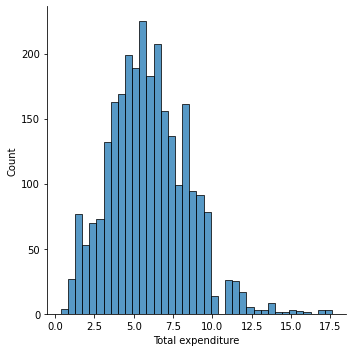

In [163]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Total expenditure'])
plt.show()

In [164]:
df_data['Total expenditure'].mean

<bound method Series.mean of 0       8.16
1       8.18
2       8.13
3       8.52
4       7.87
        ... 
2933    7.13
2934    6.52
2935    6.53
2936    6.16
2937    7.10
Name: Total expenditure, Length: 2928, dtype: float64>

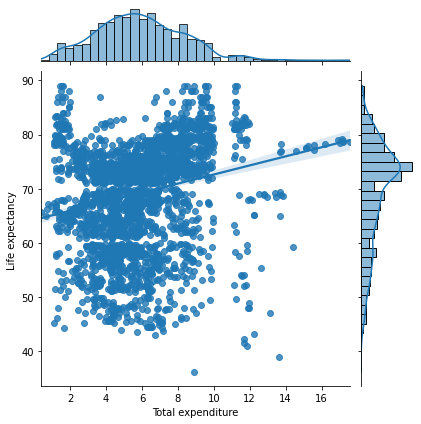

In [165]:
sns.jointplot(x='Total expenditure',y='Life expectancy ',data=df_data, kind="reg")

In [166]:
df_data['Total expenditure']=df_data['Total expenditure'].fillna(8.16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
df_data['Diphtheria '].value_counts()

99.0    347
98.0    253
97.0    205
95.0    200
96.0    199
       ... 
2.0       1
56.0      1
19.0      1
27.0      1
32.0      1
Name: Diphtheria , Length: 81, dtype: int64

<Figure size 1800x1080 with 0 Axes>

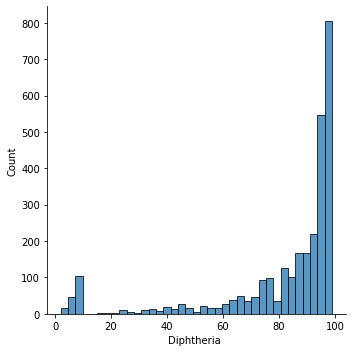

In [168]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Diphtheria '])
plt.show()

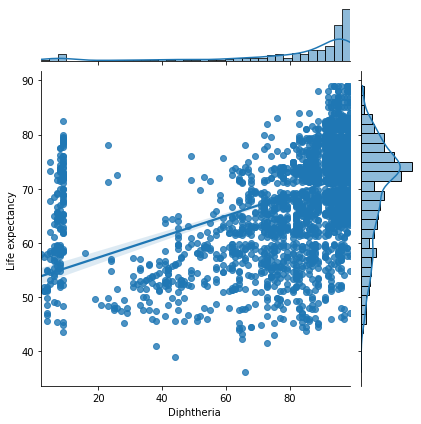

In [169]:
sns.jointplot(x='Diphtheria ',y='Life expectancy ',data=df_data, kind="reg")

In [170]:
df_data['Diphtheria ']=df_data['Diphtheria '].fillna(99.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
df_data['GDP'].value_counts()

965.669378      1
1276.265000     1
3638.959460     1
2158.299000     1
1768.921320     1
               ..
2843.636350     1
1792.384500     1
14125.961000    1
2178.921383     1
49638.771300    1
Name: GDP, Length: 2485, dtype: int64

<Figure size 1800x1080 with 0 Axes>

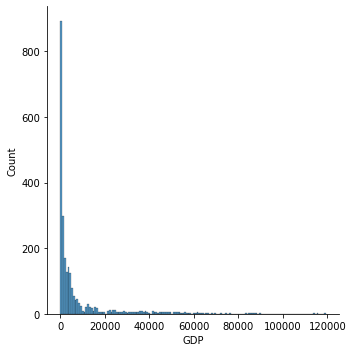

In [172]:
plt.figure(figsize=(25,15))
sns.displot(df_data['GDP'])
plt.show()

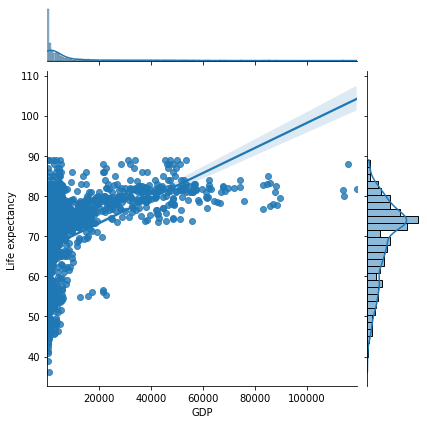

In [173]:
sns.jointplot(x='GDP',y='Life expectancy ',data=df_data, kind="reg")

**Mortality rate has a  regression (not exactly linear) but polynomial regression (2degree) relation ship with**

**life expecttancy**





In [174]:
df_data['GDP']=df_data['GDP'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
df_data['Population'].value_counts()

444.0         4
26868.0       2
127445.0      2
718239.0      2
1141.0        2
             ..
212647.0      1
21451748.0    1
19413.0       1
4442.0        1
5216.0        1
Name: Population, Length: 2277, dtype: int64

<Figure size 1800x1080 with 0 Axes>

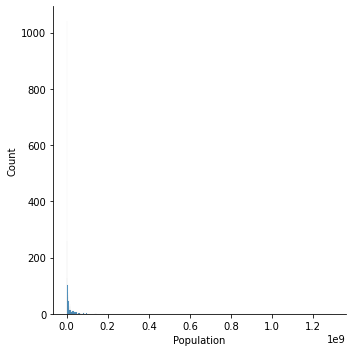

In [176]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Population'])
plt.show()

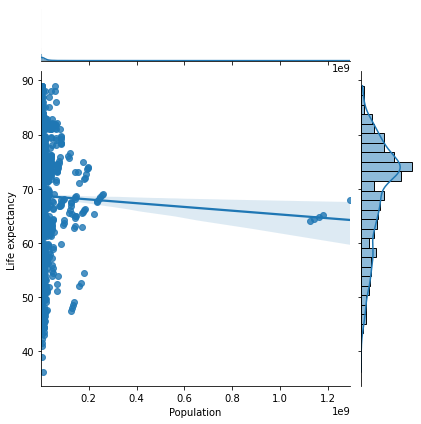

In [177]:
sns.jointplot(x='Population',y='Life expectancy ',data=df_data, kind="reg")

**Mortality rate has a no direct regression  relation ship with**

**effectiveness on expecttancy when population is low**





In [178]:
df_data['Population'].mean

<bound method Series.mean of 0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2928, dtype: float64>

In [179]:
df_data['Population']=df_data['Population'].fillna(33736494.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
df_data[' thinness  1-19 years'].value_counts()

1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
        ..
27.3     1
18.1     1
12.5     1
19.6     1
17.0     1
Name:  thinness  1-19 years, Length: 200, dtype: int64

<Figure size 1800x1080 with 0 Axes>

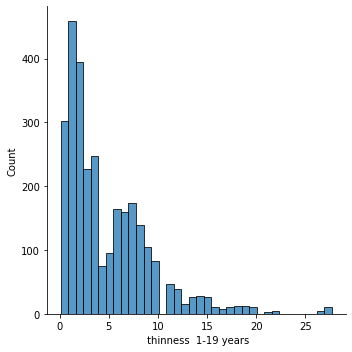

In [181]:
plt.figure(figsize=(25,15))
sns.displot(df_data[' thinness  1-19 years'])
plt.show()

In [182]:
df_data[' thinness  1-19 years'].mean

<bound method Series.mean of 0       17.2
1       17.5
2       17.7
3       17.9
4       18.2
        ... 
2933     9.4
2934     9.8
2935     1.2
2936     1.6
2937    11.0
Name:  thinness  1-19 years, Length: 2928, dtype: float64>

In [183]:
df_data[' thinness  1-19 years']=df_data[' thinness  1-19 years'].fillna(17.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
df_data[' thinness 5-9 years'].value_counts()

0.9     69
1.1     67
0.5     63
1.9     63
1.0     62
        ..
12.5     1
28.3     1
27.3     1
13.0     1
18.9     1
Name:  thinness 5-9 years, Length: 207, dtype: int64

<Figure size 1800x1080 with 0 Axes>

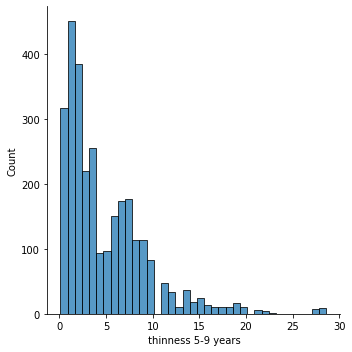

In [185]:
plt.figure(figsize=(25,15))
sns.displot(df_data[' thinness 5-9 years'])
plt.show()

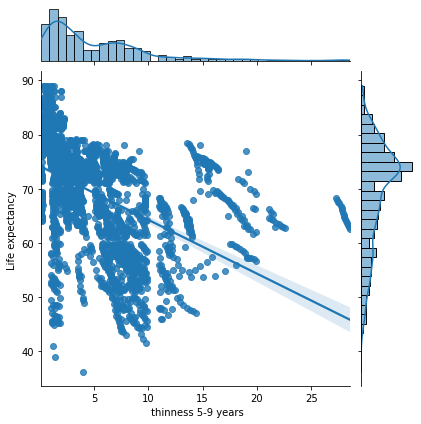

In [186]:
sns.jointplot(x=' thinness 5-9 years',y='Life expectancy ',data=df_data, kind="reg")

In [187]:
df_data[' thinness 5-9 years'].mode

<bound method Series.mode of 0       17.3
1       17.5
2       17.7
3       18.0
4       18.2
        ... 
2933     9.4
2934     9.9
2935     1.3
2936     1.7
2937    11.2
Name:  thinness 5-9 years, Length: 2928, dtype: float64>

In [188]:
df_data[' thinness 5-9 years']=df_data[' thinness 5-9 years'].fillna(17.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
df_data['Income composition of resources'].value_counts()

0.000    130
0.700     17
0.739     13
0.636     12
0.714     12
        ... 
0.914      1
0.336      1
0.348      1
0.309      1
0.352      1
Name: Income composition of resources, Length: 625, dtype: int64

<Figure size 1800x1080 with 0 Axes>

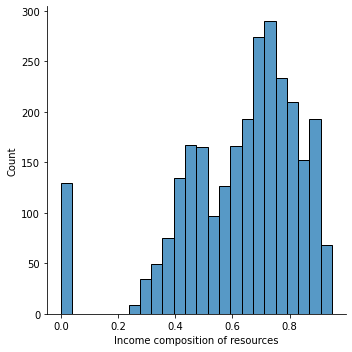

In [190]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Income composition of resources'])
plt.show()

In [191]:
df_data['Income composition of resources'].mean

<bound method Series.mean of 0       0.479
1       0.476
2       0.470
3       0.463
4       0.454
        ...  
2933    0.407
2934    0.418
2935    0.427
2936    0.427
2937    0.434
Name: Income composition of resources, Length: 2928, dtype: float64>

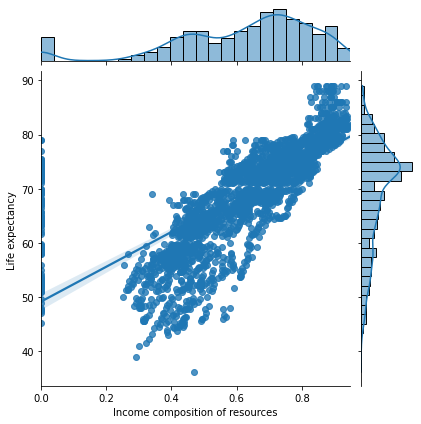

In [192]:
sns.jointplot(x='Income composition of resources',y='Life expectancy ',data=df_data, kind="reg")

In [193]:
df_data['Income composition of resources']=df_data['Income composition of resources'].fillna(4.79)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
df_data['Schooling'].value_counts()

12.9    58
13.3    52
12.5    49
12.8    46
12.3    44
        ..
20.6     1
3.0      1
18.9     1
3.1      1
4.2      1
Name: Schooling, Length: 173, dtype: int64

<Figure size 1800x1080 with 0 Axes>

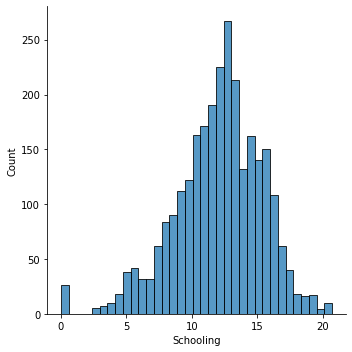

In [195]:
plt.figure(figsize=(25,15))
sns.displot(df_data['Schooling'])
plt.show()

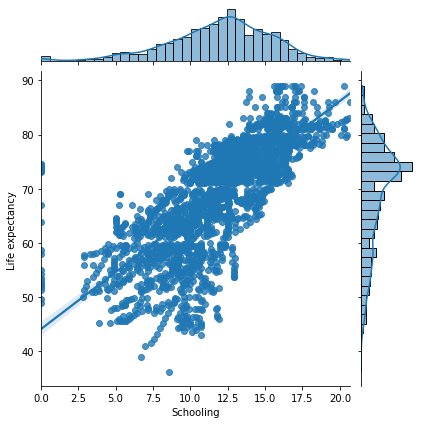

In [196]:
sns.jointplot(x='Schooling',y='Life expectancy ',data=df_data, kind="reg")

In [197]:
df_data['Schooling'].mean

<bound method Series.mean of 0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2928, dtype: float64>

In [198]:
df_data['Schooling']=df_data['Schooling'].fillna(10.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


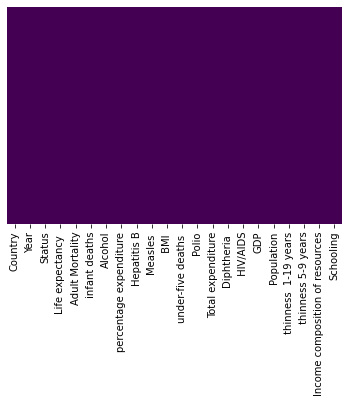

In [199]:
sns.heatmap(df_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [200]:
df_data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [201]:
#df_data

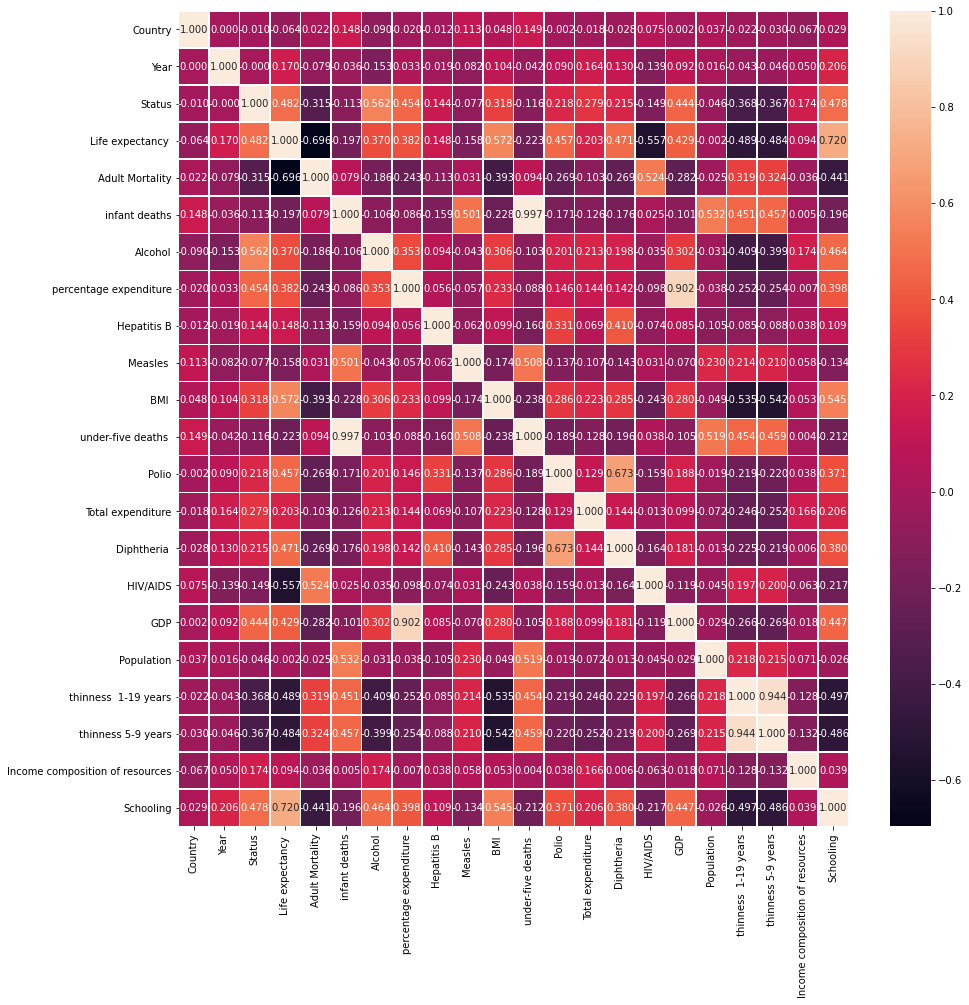

In [202]:
plt.figure(figsize=(15,15))
sns.heatmap(df_data.corr(), annot=True, linewidths=0.5, fmt= '.3f')

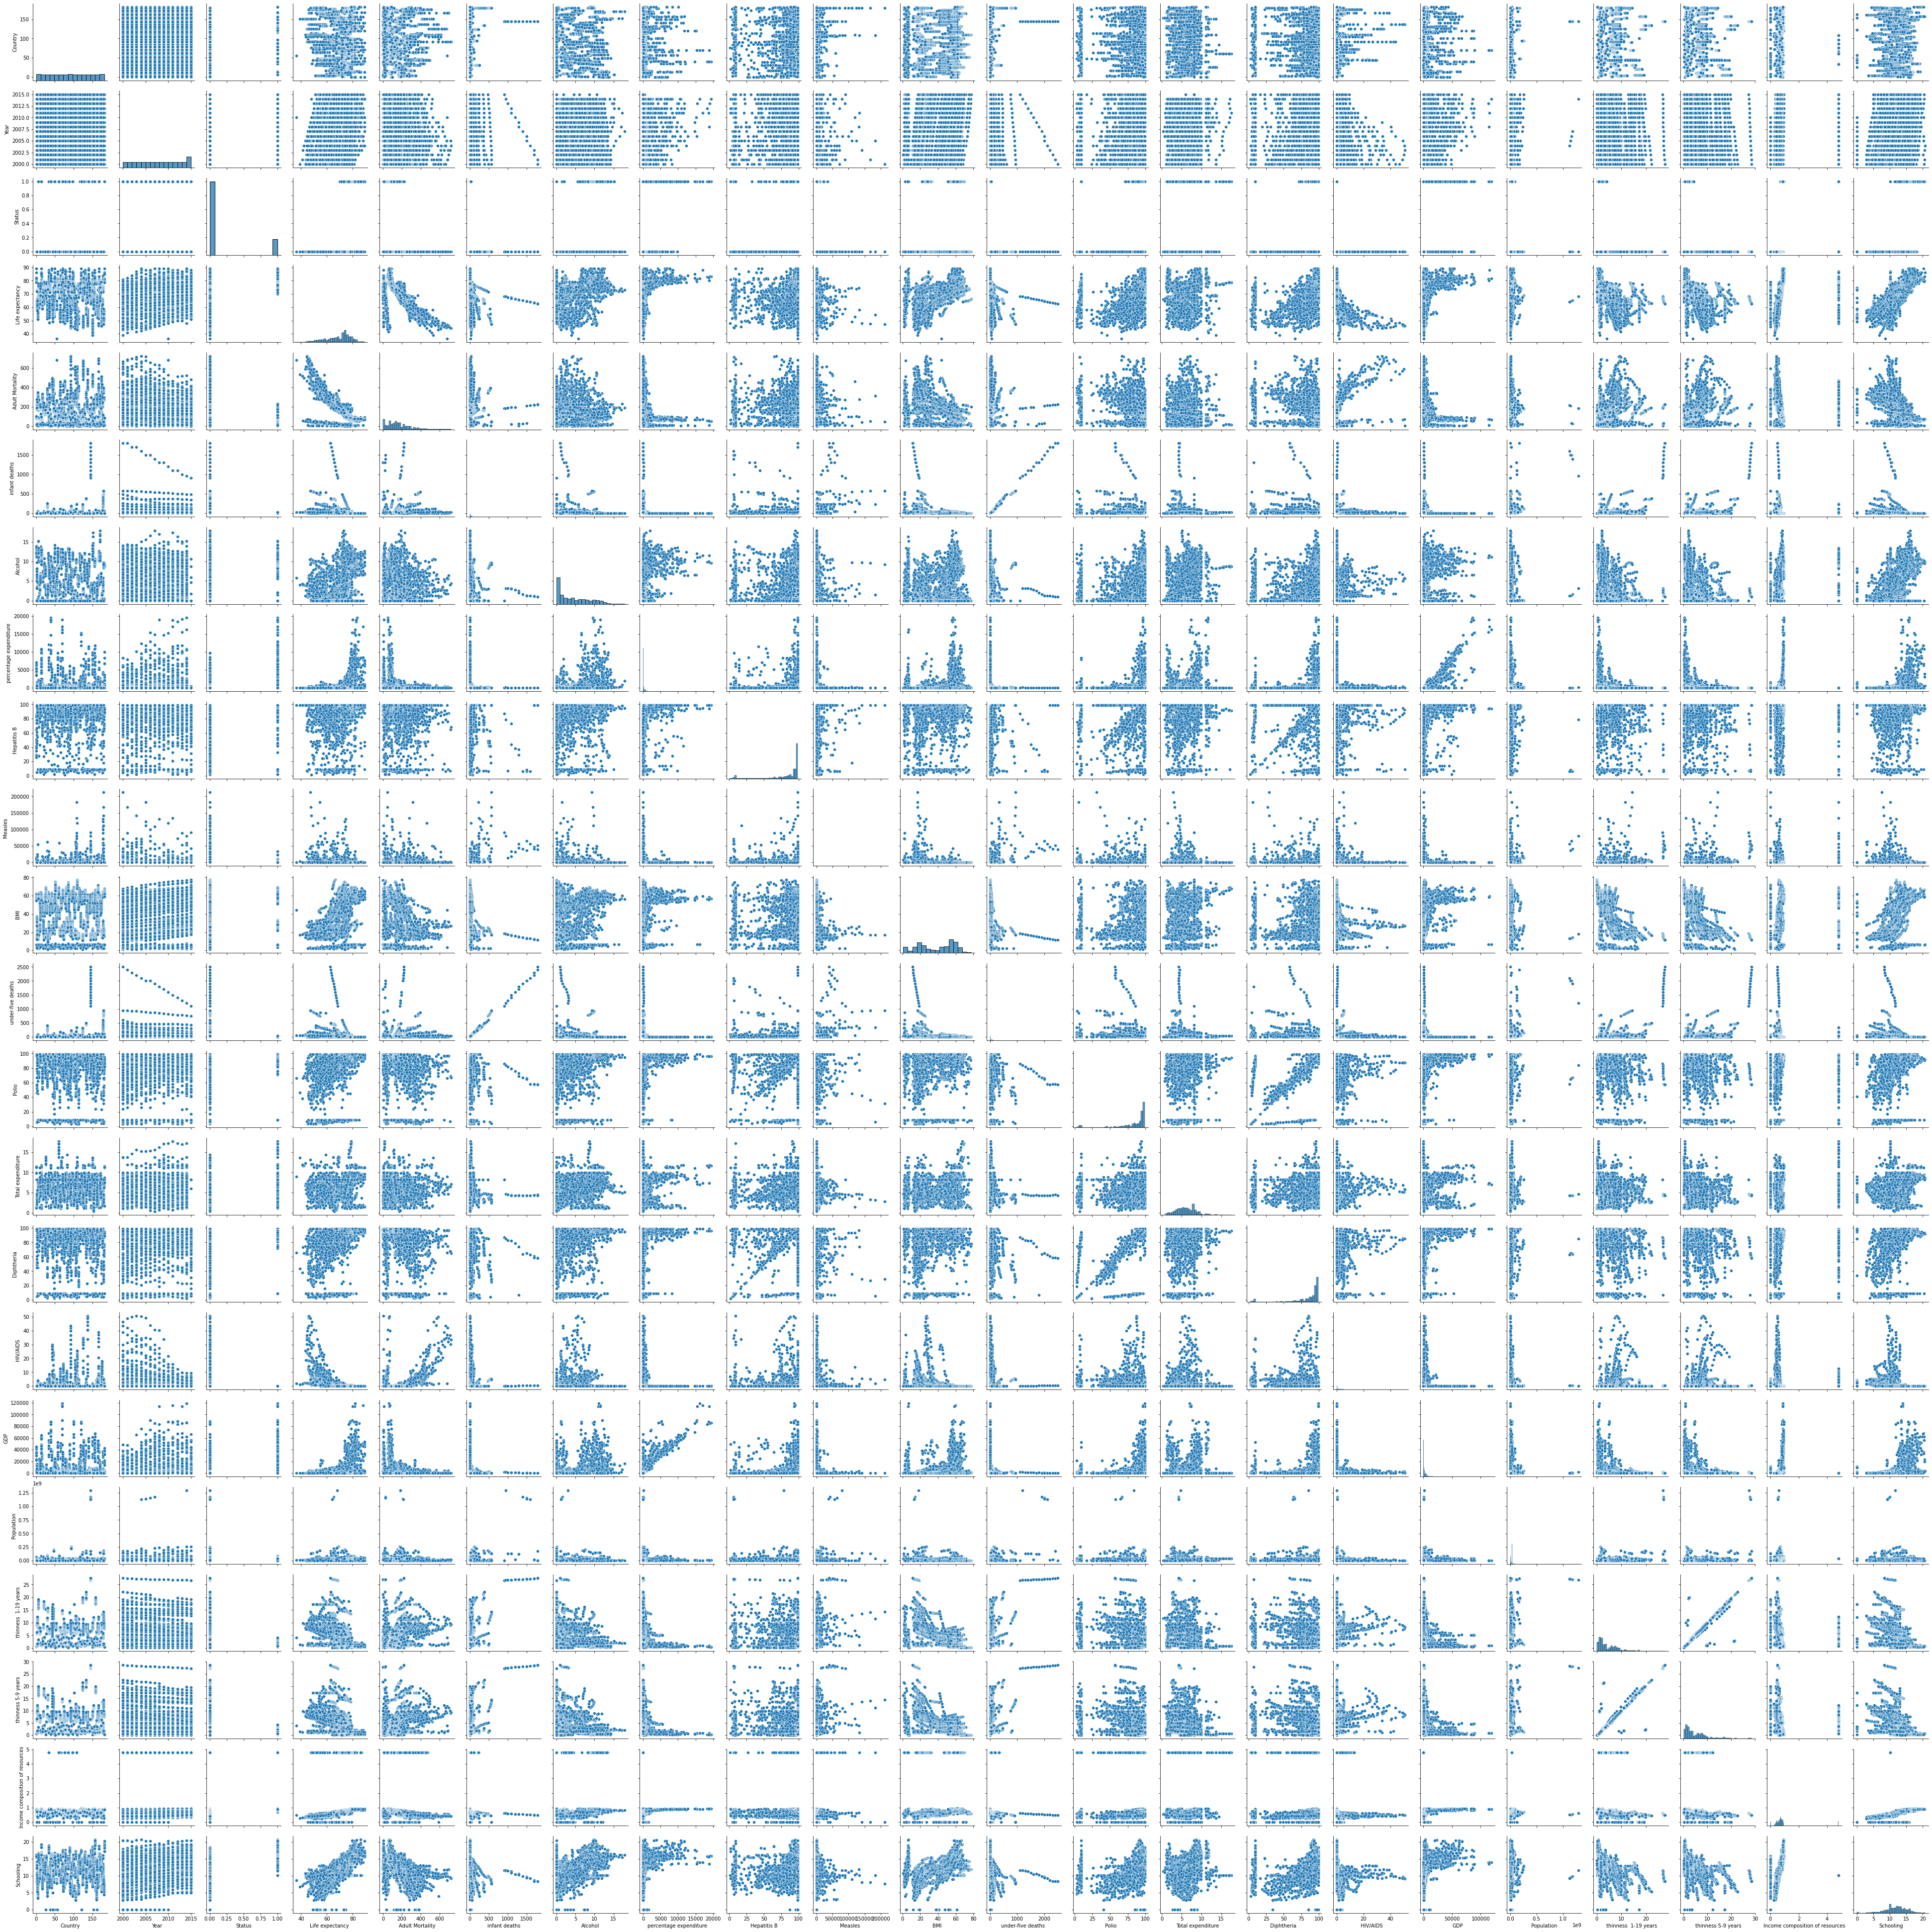

In [203]:
sns.pairplot(df_data)

In [204]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   int64  
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2928 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2928 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2928 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

**Adult Mortality** 

 **HIV/AIDS**

 **thinness  1-19 years** 

 **thinness 5-9 years** 
 
 is verry -ve corellated with target feature 

# **Building the Model**

The first task will be to **split the dataset** into train set and test set.

In [205]:
from sklearn.model_selection import train_test_split
x=df_data.drop('Life expectancy ',axis=1)
y=df_data['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


Let's check the dimension of train and test set.

In [206]:
X_train.shape

(2049, 21)

In [207]:
y_train.shape

(2049,)

In [208]:
X_test.shape

(879, 21)

In [209]:
y_test.shape

(879,)

Before moving ahead, I am importing all the models from sklearn

In [210]:
from sklearn.linear_model import LinearRegression

## Linear Regression

In [211]:
lr = LinearRegression() #create the object of the model
lr=lr.fit(X_train,y_train)

In [212]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [213]:
pred = lr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 3.1262658981516256
The MsE with the linear regressor is: 16.80089628353806
The R2_Score with the linear regressor is: 0.799019544066745


In [214]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
from itertools import chain
#y_pred = list(chain.from_iterable(y_pred))
#y_test=pd.to_numeric(y_test)
y_test=y_test.tolist()

In [215]:
for i in range(879):
    print("Actual : ", y_test[i], "; Predicted: ", y_pred[i])

Actual :  73.2 ; Predicted:  73.56679216853709
Actual :  58.4 ; Predicted:  53.40367154115069
Actual :  76.8 ; Predicted:  78.56192045992137
Actual :  78.7 ; Predicted:  74.31097732241696
Actual :  64.7 ; Predicted:  69.8138788003063
Actual :  44.5 ; Predicted:  35.708154341981384
Actual :  66.0 ; Predicted:  65.33382500668571
Actual :  77.3 ; Predicted:  75.16090305923494
Actual :  75.1 ; Predicted:  77.21810957662517
Actual :  68.8 ; Predicted:  70.73447747004283
Actual :  46.3 ; Predicted:  56.41899264771483
Actual :  79.3 ; Predicted:  78.70913789341591
Actual :  75.0 ; Predicted:  72.65485296707152
Actual :  75.4 ; Predicted:  70.18919453923394
Actual :  68.5 ; Predicted:  69.90752593990615
Actual :  81.3 ; Predicted:  85.45415826508011
Actual :  52.8 ; Predicted:  61.484660748219646
Actual :  54.4 ; Predicted:  54.20964149681954
Actual :  68.0 ; Predicted:  63.76605781440287
Actual :  68.5 ; Predicted:  71.36117168519509
Actual :  73.0 ; Predicted:  67.1614439147628
Actual :  77.

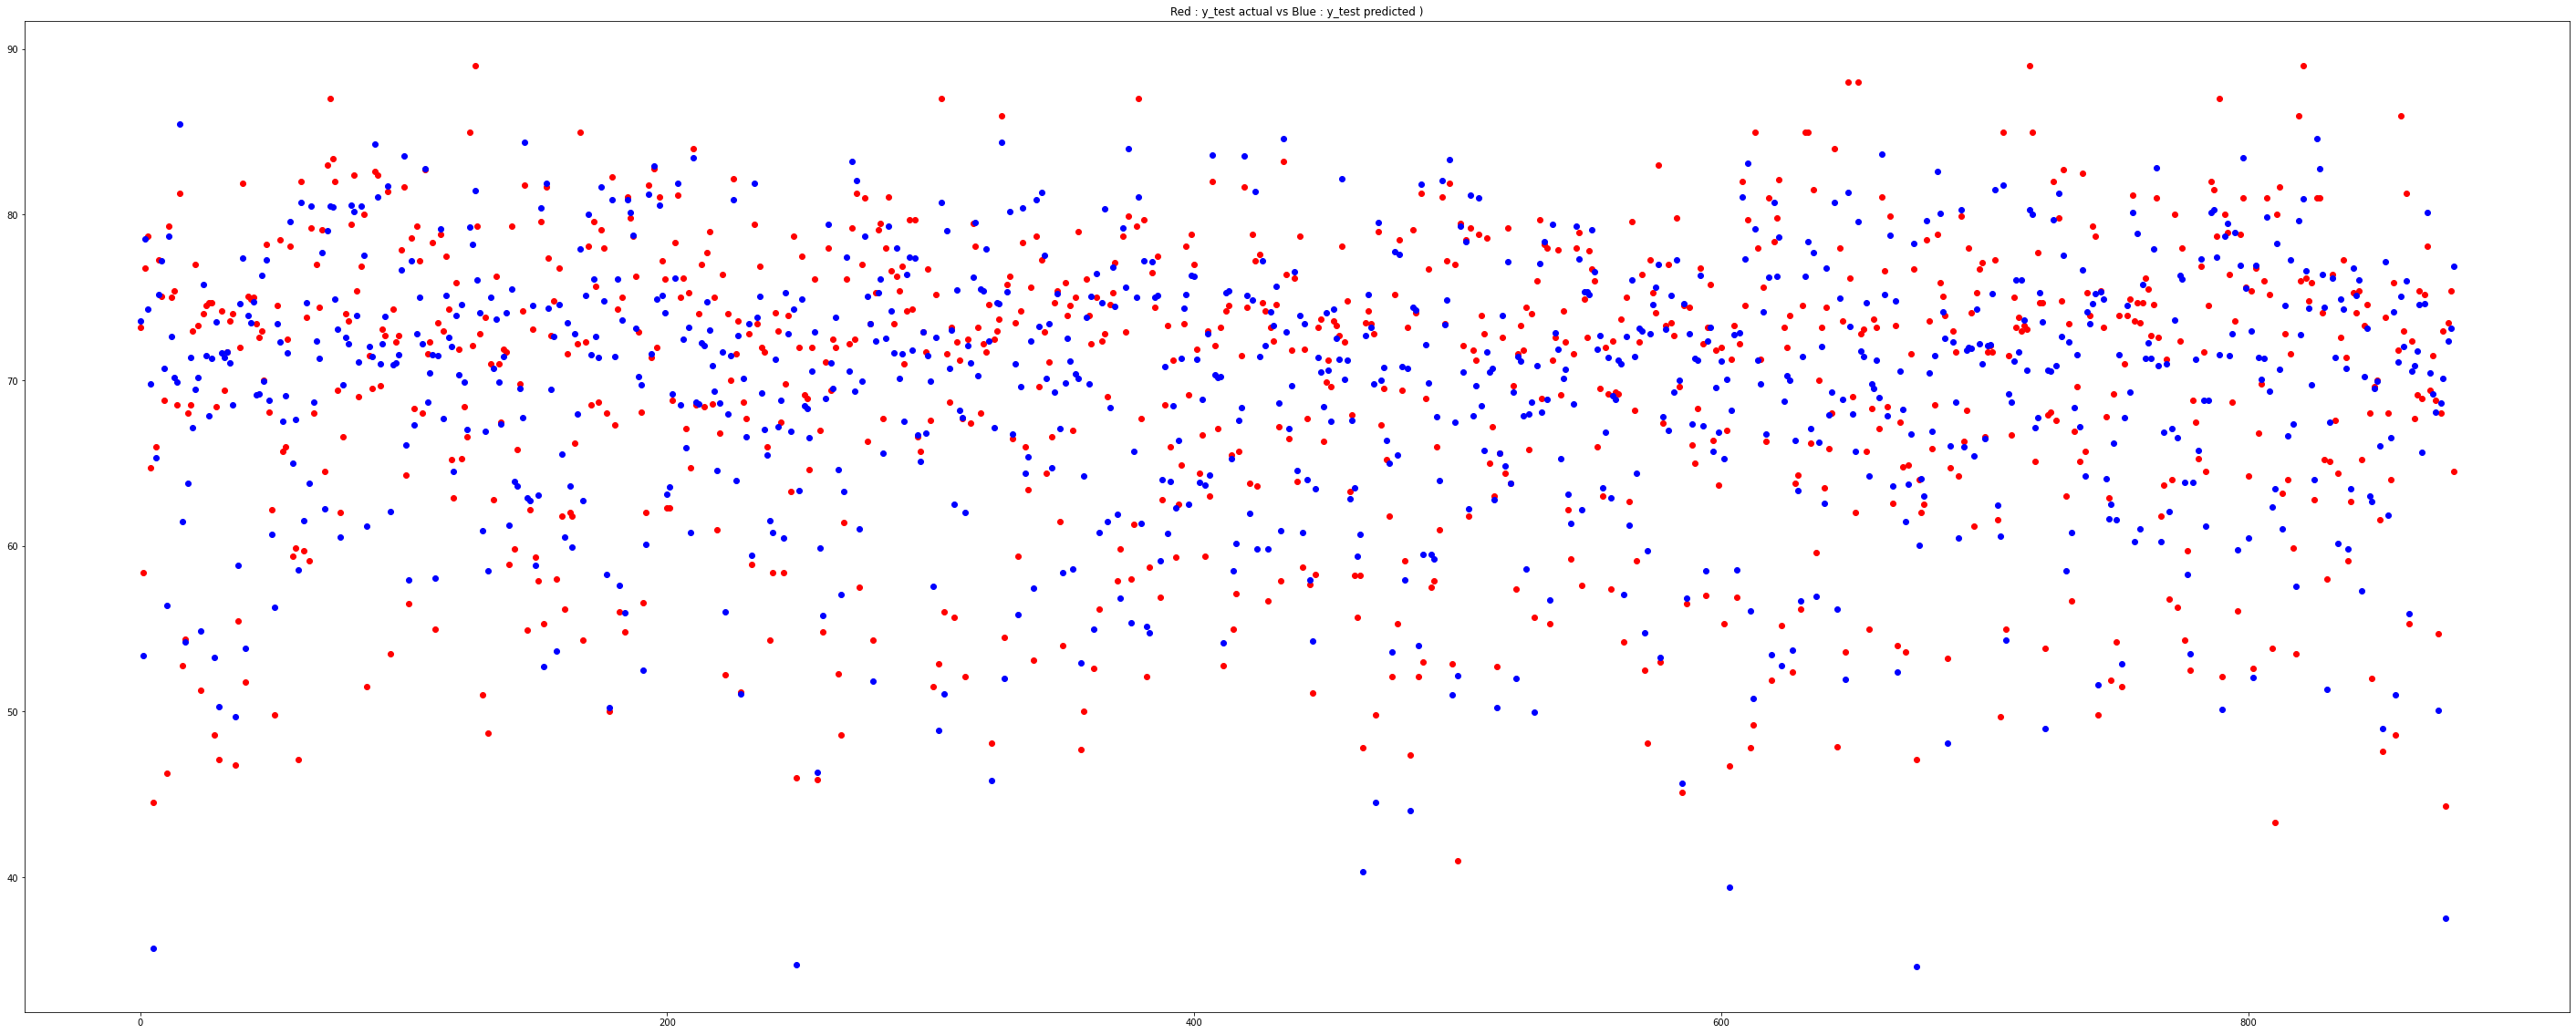

In [216]:
plt.figure(figsize=(50,20))
plt.scatter(range(len(y_test)), y_test, color = 'red')
plt.scatter(range(len(y_test)), y_pred, color = 'blue')
plt.title('Red : y_test actual vs Blue : y_test predicted )')

plt.show()

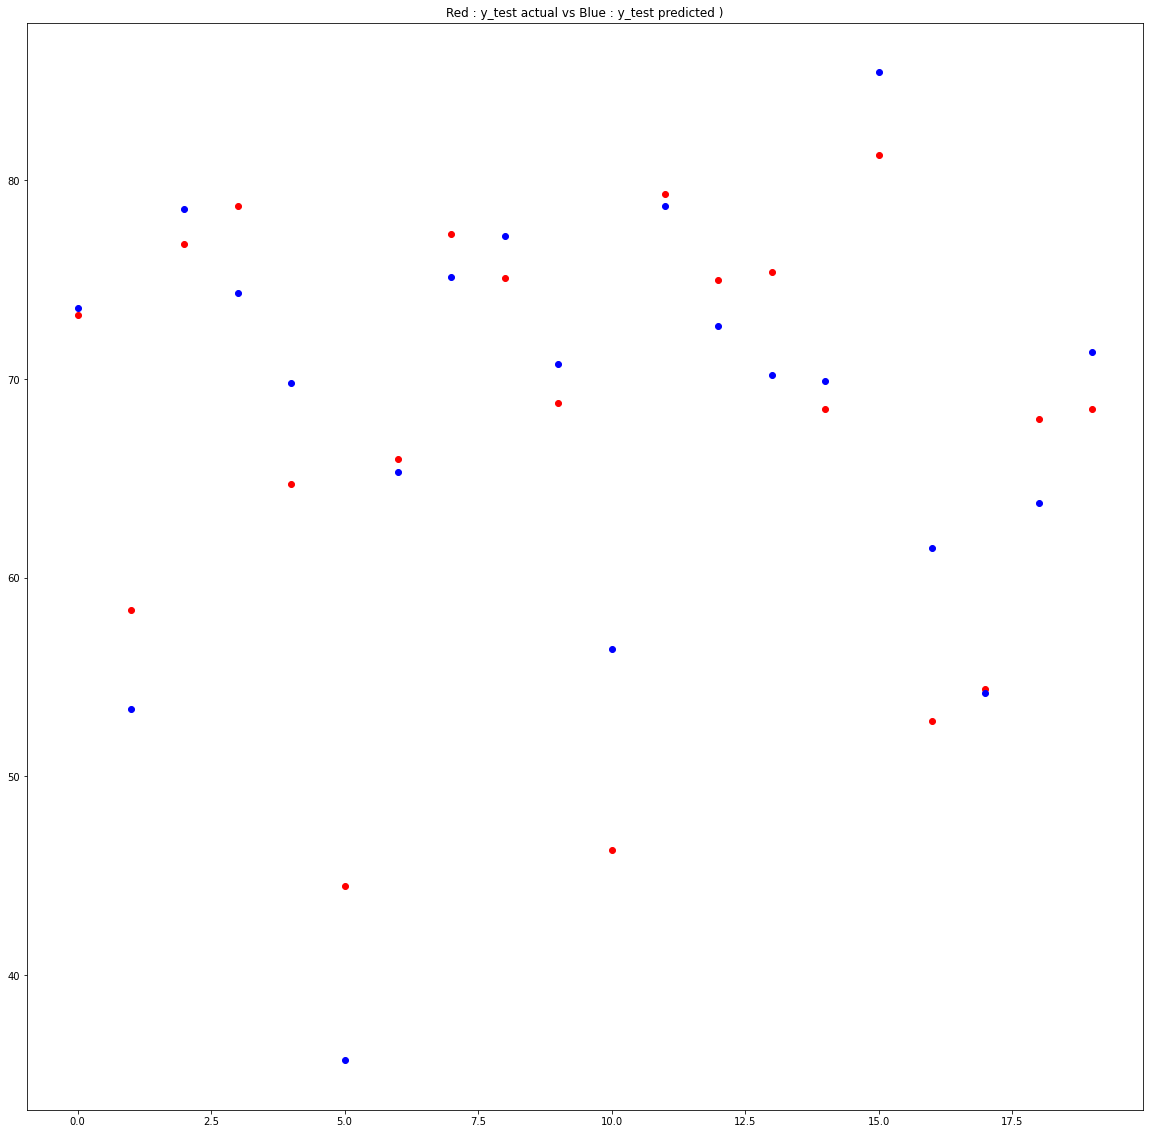

In [217]:
plt.figure(figsize=(20,20))
plt.scatter(range(20), y_test[:20], color = 'red')
plt.scatter(range(20), y_pred[:20], color = 'blue')
plt.title('Red : y_test actual vs Blue : y_test predicted )')

plt.show()